In [ ]:
# This notebook is used for training the Q-learning agent.

In [1]:
!pip install gymnasium

In [2]:
import numpy as np
import random
import gymnasium as gym
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pickle
import datetime
from gymnasium.spaces import Discrete
import pandas as pd

In [3]:
# Flat list of workouts 
workouts = [
{"id": 0, "category": "weight-based", "name": "WEIGHT-BASED WORKOUT: Beginner Strength", "duration": "30 minutes", "difficulty": "Beginner"},
{"id": 1, "category": "weight-based", "name": "WEIGHT-BASED WORKOUT: Overall body strength", "duration": "45 minutes", "difficulty": "Advanced"}, 
{"id": 2, "category": "weight-based", "name": "WEIGHT-BASED WORKOUT: Leg power", "duration": "40 minutes", "difficulty": "Intermediate"},
{"id": 3, "category": "weight-based", "name": "WEIGHT-BASED WORKOUT: Arm power", "duration": "30 minutes", "difficulty": "Any"}, 

{"id": 4, "category": "Calisthenics", "name": "Calisthenics Basics - Level 1", "duration": "30 minutes", "difficulty": "Any"},
{"id": 5, "category": "Calisthenics", "name": "Calisthenics Basics - Level 2", "duration": "45 minutes", "difficulty": "Beginner"},
{"id": 6, "category": "Calisthenics", "name": "Calisthenics Total Body - Intermediate", "duration": "50 minutes", "difficulty": "Intermediate"},
{"id": 7, "category": "Calisthenics", "name": "Calisthenics Total Body - Advanced", "duration": "50 minutes", "difficulty": "Advanced"},
    
{"id": 8, "category": "Low-impact", "name": "LOW-IMPACT: Sculpt with resistance bands", "duration": "30 minutes", "difficulty": "Any"},
{"id": 9, "category": "Low-impact", "name": "LOW-IMPACT: Beginner sculpt with resistance bands", "duration": "15 minutes", "difficulty": "Beginner"},
{"id": 10, "category": "Low-impact", "name": "LOW-IMPACT: Intermediate sculpt with resistance bands", "duration": "30 minutes", "difficulty": "Intermediate"},
{"id": 11, "category": "Low-impact", "name": "LOW-IMPACT: Super sculpt with resistance bands", "duration": "30 minutes", "difficulty": "Advanced"},

{"id": 12, "category": "Yoga", "name": "YOGA: Vinyasa Yoga", "duration": "40 minutes", "difficulty": "Intermediate"},  
{"id": 13, "category": "Yoga", "name": "YOGA: Balance", "duration": "35 minutes", "difficulty": "Advanced"},   
{"id": 14, "category": "Yoga", "name": "YOGA: Sun Salutations", "duration": "20 minutes", "difficulty": "Beginner"},
{"id": 15, "category": "Yoga", "name": "YOGA Fundamentals", "duration": "20 minutes", "difficulty": "Any"},    

{"id": 16, "category": "Pilates", "name": "Mat Pilates Beginner", "duration": "30 minutes", "difficulty": "Beginner"},    
{"id": 17, "category": "Pilates", "name": "Mat Pilates Intermediate", "duration": "45 minutes", "difficulty": "Intermediate"},  
{"id": 18, "category": "Pilates", "name": "Mat Pilates Advanced", "duration": "60 minutes", "difficulty": "Advanced"},
{"id": 19, "category": "Pilates", "name": "Mat Pilates Fundamentals", "duration": "30 minutes", "difficulty": "Any"},    

{"id": 20, "category": "Barre", "name": "Intro to Barre", "duration": "20 minutes", "difficulty": "Any"},  
{"id": 21, "category": "Barre", "name": "Beginner Barre", "duration": "30 minutes", "difficulty": "Beginner"},  
{"id": 22, "category": "Barre", "name": "Intermediate Barre", "duration": "40 minutes", "difficulty": "Intermediate"},  
{"id": 23, "category": "Barre", "name": "Advanced Barre - Extreme", "duration": "45 minutes", "difficulty": "Advanced"}, 

{"id": 24, "category": "Mobility", "name": "MOBILITY: Warm-up", "duration": "10 minutes", "difficulty": "Any"}, 
{"id": 25, "category": "Mobility", "name": "MOBILITY: Movement maximiser", "duration": "20 minutes", "difficulty": "Advanced"},
{"id": 26, "category": "Mobility", "name": "MOBILITY: Increase Range of Movement", "duration": "15 minutes", "difficulty": "Intermediate"},    
{"id": 27, "category": "Mobility", "name": "MOBILITY Basics", "duration": "15 minutes", "difficulty": "Beginner"},

{"id": 28, "category": "Flexibility", "name": "Flexibility Basics", "duration": "10 minutes", "difficulty": "Beginner"}, 
{"id": 29, "category": "Flexibility", "name": "FLEXIBILITY: Flex & Flow", "duration": "15 minutes", "difficulty": "Intermediate"},
{"id": 30, "category": "Flexibility", "name": "FLEXIBILITY: Stretch Further", "duration": "15 minutes", "difficulty": "Advanced"},
{"id": 31, "category": "Flexibility", "name": "Flexibility Warm-down stretch", "duration": "10 minutes", "difficulty": "Any"},     

{"id": 32, "category": "Core", "name": "Core Essentials 1", "duration": "10 minutes", "difficulty": "Beginner"},     
{"id": 33, "category": "Core", "name": "Core Circuit", "duration": "30 minutes", "difficulty": "Advanced"},  
{"id": 34, "category": "Core", "name": "Core Essentials 2", "duration": "15 minutes", "difficulty": "Intermediate"},   
{"id": 35, "category": "Core", "name": "Core Basics", "duration": "15 minutes", "difficulty": "Any"}, 

{"id": 36, "category": "Road Running", "name": "Road Running - Build to a faster 5K", "duration": "45 minutes", "difficulty": "Any"},
{"id": 37, "category": "Road Running", "name": "Road Running - Beginner Run", "duration": "30 minutes", "difficulty": "Beginner"},
{"id": 38, "category": "Road Running", "name": "Road Running - 10k Target Time", "duration": "60 minutes", "difficulty": "Intermediate"},         
{"id": 39, "category": "Road Running", "name": "Road Running - Half Marathon Training", "duration": "45 minutes", "difficulty": "Advanced"},            

{"id": 40, "category": "Treadmill Running", "name": "Treadmill Running - hill sprints", "duration": "30 minutes", "difficulty": "Advanced"},  
{"id": 41, "category": "Treadmill Running", "name": "Treadmill Running - 5K Run", "duration": "30 minutes", "difficulty": "Beginner"},  
{"id": 42, "category": "Treadmill Running", "name": "Treadmill Running - Speed Endurance Intervals", "duration": "30 minutes", "difficulty": "Intermediate"},
{"id": 43, "category": "Treadmill Running", "name": "Treadmill Running - Power & Endurance", "duration": "40 minutes", "difficulty": "Any"},

{"id": 44, "category": "Track Running", "name": "Track Running - 400m repeats for a faster 5k", "duration": "60 minutes", "difficulty": "Beginner"},  
{"id": 45, "category": "Track Running", "name": "Track Running - Threshold Intervals", "duration": "60 minutes", "difficulty": "Intermediate"},
{"id": 46, "category": "Track Running", "name": "Track Running - Speed Intervals", "duration": "45 minutes", "difficulty": "Advanced"}, 
{"id": 47, "category": "Track Running", "name": "Track Running - Power & Endurance", "duration": "45 minutes", "difficulty": "Any"},     

{"id": 48, "category": "HIIT", "name": "Beginner HIIT", "duration": "30 minutes", "difficulty": "Beginner"},
{"id": 49, "category": "HIIT", "name": "Intermediate HIIT", "duration": "30 minutes", "difficulty": "Intermediate"},  
{"id": 50, "category": "HIIT", "name": "Advanced HIIT", "duration": "40 minutes", "difficulty": "Advanced"},  
{"id": 51, "category": "HIIT", "name": "HIIT Fundamentals", "duration": "30 minutes", "difficulty": "Any"},    

{"id": 52, "category": "Circuit", "name": "Beginner Circuit", "duration": "30 minutes", "difficulty": "Beginner"},
{"id": 53, "category": "Circuit", "name": "Intermediate Circuit", "duration": "30 minutes", "difficulty": "Intermediate"},  
{"id": 54, "category": "Circuit", "name": "Advanced Circuit", "duration": "40 minutes", "difficulty": "Advanced"},  
{"id": 55, "category": "Circuit", "name": "Circuit Training Fundamentals", "duration": "30 minutes", "difficulty": "Any"},        
    
{"id": 56, "category": "CrossFit", "name": "Beginner CrossFit", "duration": "30 minutes", "difficulty": "Beginner"},
{"id": 57, "category": "CrossFit", "name": "Intermediate CrossFit", "duration": "30 minutes", "difficulty": "Intermediate"},  
{"id": 58, "category": "CrossFit", "name": "Advanced CrossFit", "duration": "40 minutes", "difficulty": "Advanced"},  
{"id": 59, "category": "CrossFit", "name": "CrossFit Training Fundamentals", "duration": "30 minutes", "difficulty": "Any"},        
     
{"id": 60, "category": "Cycling", "name": "Cycling - 30/30 blast", "duration": "45 minutes", "difficulty": "Advanced"},  
{"id": 61, "category": "Cycling", "name": "Cycling Tempo Intervals", "duration": "60 minutes", "difficulty": "Intermediate"},
{"id": 62, "category": "Cycling", "name": "Cycling - High Cadence Ride", "duration": "60 minutes", "difficulty": "Any"},    
{"id": 63, "category": "Cycling", "name": "Basic Cycling Cardio", "duration": "45 minutes", "difficulty": "Beginner"}, 

{"id": 64, "category": "Skipping", "name": "Beginner Skipping", "duration": "15 minutes", "difficulty": "Beginner"},  
{"id": 65, "category": "Skipping", "name": "Intermediate Skipping", "duration": "30 minutes", "difficulty": "Intermediate"},
{"id": 66, "category": "Skipping", "name": "Advanced Skipping", "duration": "30 minutes", "difficulty": "Advanced"},    
{"id": 67, "category": "Skipping", "name": "Skipping Fundamentals", "duration": "15 minutes", "difficulty": "Any"},     
    
{"id": 68, "category": "Swimming", "name": "Continuous Swim", "duration": "30 minutes", "difficulty": "Beginner"}, 
{"id": 69, "category": "Swimming", "name": "Swimming Technique Work", "duration": "30 minutes", "difficulty": "Any"}, 
{"id": 70, "category": "Swimming", "name": "Swimming: Speed Intervals", "duration": "45 minutes", "difficulty": "Intermediate"},     
{"id": 71, "category": "Swimming", "name": "Swimming Endurance Intervals", "duration": "60 minutes", "difficulty": "Advanced"},
    
    
{"id": 72, "category": "Elliptical", "name": "Elliptical: 15 minutes beginner workout", "duration": "15 minutes", "difficulty": "Beginner"},  
{"id": 73, "category": "Elliptical", "name": "Elliptical blast", "duration": "45 minutes", "difficulty": "Intermediate"},      
{"id": 74, "category": "Elliptical", "name": "Elliptical Power & Resistance", "duration": "30 minutes", "difficulty": "Advanced"},
{"id": 75, "category": "Elliptical", "name": "Elliptical continuous", "duration": "30 minutes", "difficulty": "Any"},      
    
    
{"id": 76, "category": "Rowing", "name": "Beginner Rowing Workout", "duration": "20 minutes", "difficulty": "Beginner"},
{"id": 77, "category": "Rowing", "name": "ROWING: Power intervals", "duration": "30 minutes", "difficulty": "Advanced"},
{"id": 78, "category": "Rowing", "name": "Rowing Speed Intervals", "duration": "30 minutes", "difficulty": "Intermediate"},      
{"id": 79, "category": "Rowing", "name": "Rowing - Warm up", "duration": "10 minutes", "difficulty": "Any"},

{"id": 80, "category": "Stair Climb", "name": "Beginner Stair Climb Workout", "duration": "15 minutes", "difficulty": "Beginner"},
{"id": 81, "category": "Stair Climb", "name": "Stair Climb Power intervals", "duration": "30 minutes", "difficulty": "Advanced"},
{"id": 82, "category": "Stair Climb", "name": "Stair Climb Speed Intervals", "duration": "30 minutes", "difficulty": "Intermediate"},      
{"id": 83, "category": "Stair Climb", "name": "Stair Climb - Warm up", "duration": "10 minutes", "difficulty": "Any"},
        
    
]


# Map each workout index to its category for reward simulation 
action_to_category = {i: workout["category"] for i, workout in enumerate(workouts)}





In [4]:
#Load the simulated users
# Load the simulated users from the final CSV file
user_df = pd.read_csv("Simulated_Users_Cluster_1_Training.csv")

# Convert each row to a simulated user dictionary
simulated_users = []

for _, row in user_df.iterrows():
    response_probs = {col: row[col] for col in user_df.columns if col != "User"}  
    user = {"response_probs": response_probs}
    simulated_users.append(user)

    

In [5]:
# Custom Environment

class WorkoutEnv(gym.Env):
    
    def __init__(self, num_workouts=84): 
        
        super(WorkoutEnv, self).__init__()
        
        self.num_workouts = num_workouts
        
        self.step_count = 0 
        self.max_steps = 10 # ADDED to make episodes terminate using a step limit; max steps per episode 
        
        
        # Spaces 
        self.observation_space = Discrete(num_workouts) 
        self.action_space = Discrete(self.num_workouts) 

        self.current_workout = 0 # Store current state 
        
        self.user_list = []
        self.current_user = None
        self.action_to_category = {} 
        

    # User simulation 
    def set_user_simulator(self, user_list):
        self.user_list = user_list
        
        
     # Set the mapping between actions and workout categories
    def set_action_to_category(self, mapping):
        self.action_to_category = mapping

        
        
    # Starting workout for the user (selected at random) 
    def _get_initial_state(self, user):
        return random.randint(0, self.num_workouts - 1)
    
    
    
    # Return the next workout after an action is taken, at random
    def _get_next_state(self):
        return random.randint(0, self.num_workouts - 1)
        
        
        
        # MODIFICATIONS TO DEF RESET FOR USER SIMULATION     
    def reset(self):
        self.current_user = random.choice(self.user_list)
        initial_state = self._get_initial_state(self.current_user)
        return initial_state, None

    
    
    def step(self,action): # Modified for user simulation
        
        category = self.action_to_category.get(action, "unknown") # Look up the workout category
        
        prob = self.current_user["response_probs"].get(category, 0.3) # get the probability of user liking this category
                                 
        reward = 1 if random.random() < prob else -1 # simulate whether the user liked the workout 
                                 
        next_state = self._get_next_state()  # next state/workout                        
        terminated = reward == 1  # episode ends if workout is liked 
        truncated = False
        return next_state, reward, terminated, truncated, None

    
    
    
    
        


In [6]:
# Set up the environment with workouts and simulated users 
env = WorkoutEnv(num_workouts=len(workouts))
env.set_user_simulator(simulated_users)
env.set_action_to_category(action_to_category) 


In [7]:
# Define the environment

env.set_user_simulator(simulated_users)
env.set_action_to_category(action_to_category)


# Define the q table 
q_table = np.zeros((env.num_workouts, env.num_workouts))


# Define the num of episodes and steps per episode
episodes = 25000 # adapted from 60000 
steps = 10 # adapted from 15

# define hyperparameters 
alpha = 0.4           # Reduced from 0.85
gamma = 0.8                  

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.025             # Minimum exploration probability; changde from 0.05
#decay_rate = 0.00005          # Exponential decay rate for exploration prob --> commented out for linear decay

# For the linear decay:
start_epsilon_decaying = 1 

end_epsilon_decaying = int(episodes * 0.35) # decay around a third of the way (adapted from 0.5)
epsilon_decay_value = epsilon / (end_epsilon_decaying - start_epsilon_decaying)


# Define the metric list to plot
mean_reward_per_episode = []
total_reward_per_episode = []
number_of_steps_to_complete = []
actions_history = []
epsilon_history = []
total_done = []


# adding more metrics 
rolling_averages = []
rolling_averages_eps = []
rolling_window_size = 150
total_reward_per_episode = []


In [8]:
# Training Loop 


for episode in range(episodes):
    if episode % 10 == 0 :
        print(f"Episode {episode}/{episodes}")
        
    # Reset the environment and get the initial state
    state,_ = env.reset() 
      

    rewards_episode = []
    rewards = []
    actions_episode = []
    
 
    epsilon_history.append(epsilon) 

    for step in range(steps):
        # Choose an action using an epsilon-greedy policy
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state])# changed here, not 0
        
        actions_episode.append(action)

        # Take the action and get the next state, reward, and done flag        
        next_state, reward, terminated, truncated, _= env.step(action) 
        
        
        
        if episode % 1000 == 0 and step == 0:
            category = env.action_to_category.get(action, "unknown")
            print(f"Episode{episode}: User liked {category}? Reward: {reward}")
            
        if episode % 1000 == 0 and step == 0:
            print(f"Episode {episode}: Action={action}, Category={category}, Reward={reward}") # For debugging

        
       
        # Update the Q-table
        q_table[state][action] = (1 - alpha) * q_table[state][action] + alpha * (reward + gamma * np.max(q_table[next_state]))
        
        
        # Update the state
        state = next_state
        
        rewards_episode.append(reward)
        
        # Check if the episode is done
        if terminated or truncated:
            break

    
    # Reduce epsilon (because we need less and less exploration) exponential decay 
    
    if end_epsilon_decaying >= episode >= start_epsilon_decaying: # linear decay 
        epsilon -= epsilon_decay_value
    if epsilon <= min_epsilon:
        epsilon = min_epsilon
    

    
    actions_history.append(actions_episode)

    total_done.append(terminated or truncated)

   
    mean_reward_per_episode.append(np.mean(rewards_episode))
    total_reward_per_episode.append(np.sum(rewards_episode))
    number_of_steps_to_complete.append(step)
    
    
     # Calculate the rolling average using Pandas with a window of size 150
    if episode >= rolling_window_size - 1:
        rolling_average = pd.Series(total_reward_per_episode).rolling(window=rolling_window_size).mean().values[-1]
        rolling_averages.append(rolling_average)
        rolling_averages_eps.append(episode)
    
# Debugging - Check Q-table
counter = 0
for q in q_table:
    if q.any():
       print(q)
    else:
      counter+=1
print(str(counter) + " zeros.")


Episode 0/25000
Episode0: User liked Flexibility? Reward: -1
Episode 0: Action=30, Category=Flexibility, Reward=-1
Episode 10/25000
Episode 20/25000
Episode 30/25000
Episode 40/25000
Episode 50/25000
Episode 60/25000
Episode 70/25000
Episode 80/25000
Episode 90/25000
Episode 100/25000
Episode 110/25000
Episode 120/25000
Episode 130/25000
Episode 140/25000
Episode 150/25000
Episode 160/25000
Episode 170/25000
Episode 180/25000
Episode 190/25000
Episode 200/25000
Episode 210/25000
Episode 220/25000
Episode 230/25000
Episode 240/25000
Episode 250/25000
Episode 260/25000
Episode 270/25000
Episode 280/25000
Episode 290/25000
Episode 300/25000
Episode 310/25000
Episode 320/25000
Episode 330/25000
Episode 340/25000
Episode 350/25000
Episode 360/25000
Episode 370/25000
Episode 380/25000
Episode 390/25000
Episode 400/25000
Episode 410/25000
Episode 420/25000
Episode 430/25000
Episode 440/25000
Episode 450/25000
Episode 460/25000
Episode 470/25000
Episode 480/25000
Episode 490/25000
Episode 500/

Episode 4110/25000
Episode 4120/25000
Episode 4130/25000
Episode 4140/25000
Episode 4150/25000
Episode 4160/25000
Episode 4170/25000
Episode 4180/25000
Episode 4190/25000
Episode 4200/25000
Episode 4210/25000
Episode 4220/25000
Episode 4230/25000
Episode 4240/25000
Episode 4250/25000
Episode 4260/25000
Episode 4270/25000
Episode 4280/25000
Episode 4290/25000
Episode 4300/25000
Episode 4310/25000
Episode 4320/25000
Episode 4330/25000
Episode 4340/25000
Episode 4350/25000
Episode 4360/25000
Episode 4370/25000
Episode 4380/25000
Episode 4390/25000
Episode 4400/25000
Episode 4410/25000
Episode 4420/25000
Episode 4430/25000
Episode 4440/25000
Episode 4450/25000
Episode 4460/25000
Episode 4470/25000
Episode 4480/25000
Episode 4490/25000
Episode 4500/25000
Episode 4510/25000
Episode 4520/25000
Episode 4530/25000
Episode 4540/25000
Episode 4550/25000
Episode 4560/25000
Episode 4570/25000
Episode 4580/25000
Episode 4590/25000
Episode 4600/25000
Episode 4610/25000
Episode 4620/25000
Episode 4630

Episode 8220/25000
Episode 8230/25000
Episode 8240/25000
Episode 8250/25000
Episode 8260/25000
Episode 8270/25000
Episode 8280/25000
Episode 8290/25000
Episode 8300/25000
Episode 8310/25000
Episode 8320/25000
Episode 8330/25000
Episode 8340/25000
Episode 8350/25000
Episode 8360/25000
Episode 8370/25000
Episode 8380/25000
Episode 8390/25000
Episode 8400/25000
Episode 8410/25000
Episode 8420/25000
Episode 8430/25000
Episode 8440/25000
Episode 8450/25000
Episode 8460/25000
Episode 8470/25000
Episode 8480/25000
Episode 8490/25000
Episode 8500/25000
Episode 8510/25000
Episode 8520/25000
Episode 8530/25000
Episode 8540/25000
Episode 8550/25000
Episode 8560/25000
Episode 8570/25000
Episode 8580/25000
Episode 8590/25000
Episode 8600/25000
Episode 8610/25000
Episode 8620/25000
Episode 8630/25000
Episode 8640/25000
Episode 8650/25000
Episode 8660/25000
Episode 8670/25000
Episode 8680/25000
Episode 8690/25000
Episode 8700/25000
Episode 8710/25000
Episode 8720/25000
Episode 8730/25000
Episode 8740

Episode 12200/25000
Episode 12210/25000
Episode 12220/25000
Episode 12230/25000
Episode 12240/25000
Episode 12250/25000
Episode 12260/25000
Episode 12270/25000
Episode 12280/25000
Episode 12290/25000
Episode 12300/25000
Episode 12310/25000
Episode 12320/25000
Episode 12330/25000
Episode 12340/25000
Episode 12350/25000
Episode 12360/25000
Episode 12370/25000
Episode 12380/25000
Episode 12390/25000
Episode 12400/25000
Episode 12410/25000
Episode 12420/25000
Episode 12430/25000
Episode 12440/25000
Episode 12450/25000
Episode 12460/25000
Episode 12470/25000
Episode 12480/25000
Episode 12490/25000
Episode 12500/25000
Episode 12510/25000
Episode 12520/25000
Episode 12530/25000
Episode 12540/25000
Episode 12550/25000
Episode 12560/25000
Episode 12570/25000
Episode 12580/25000
Episode 12590/25000
Episode 12600/25000
Episode 12610/25000
Episode 12620/25000
Episode 12630/25000
Episode 12640/25000
Episode 12650/25000
Episode 12660/25000
Episode 12670/25000
Episode 12680/25000
Episode 12690/25000


Episode 16100/25000
Episode 16110/25000
Episode 16120/25000
Episode 16130/25000
Episode 16140/25000
Episode 16150/25000
Episode 16160/25000
Episode 16170/25000
Episode 16180/25000
Episode 16190/25000
Episode 16200/25000
Episode 16210/25000
Episode 16220/25000
Episode 16230/25000
Episode 16240/25000
Episode 16250/25000
Episode 16260/25000
Episode 16270/25000
Episode 16280/25000
Episode 16290/25000
Episode 16300/25000
Episode 16310/25000
Episode 16320/25000
Episode 16330/25000
Episode 16340/25000
Episode 16350/25000
Episode 16360/25000
Episode 16370/25000
Episode 16380/25000
Episode 16390/25000
Episode 16400/25000
Episode 16410/25000
Episode 16420/25000
Episode 16430/25000
Episode 16440/25000
Episode 16450/25000
Episode 16460/25000
Episode 16470/25000
Episode 16480/25000
Episode 16490/25000
Episode 16500/25000
Episode 16510/25000
Episode 16520/25000
Episode 16530/25000
Episode 16540/25000
Episode 16550/25000
Episode 16560/25000
Episode 16570/25000
Episode 16580/25000
Episode 16590/25000


Episode 20010/25000
Episode 20020/25000
Episode 20030/25000
Episode 20040/25000
Episode 20050/25000
Episode 20060/25000
Episode 20070/25000
Episode 20080/25000
Episode 20090/25000
Episode 20100/25000
Episode 20110/25000
Episode 20120/25000
Episode 20130/25000
Episode 20140/25000
Episode 20150/25000
Episode 20160/25000
Episode 20170/25000
Episode 20180/25000
Episode 20190/25000
Episode 20200/25000
Episode 20210/25000
Episode 20220/25000
Episode 20230/25000
Episode 20240/25000
Episode 20250/25000
Episode 20260/25000
Episode 20270/25000
Episode 20280/25000
Episode 20290/25000
Episode 20300/25000
Episode 20310/25000
Episode 20320/25000
Episode 20330/25000
Episode 20340/25000
Episode 20350/25000
Episode 20360/25000
Episode 20370/25000
Episode 20380/25000
Episode 20390/25000
Episode 20400/25000
Episode 20410/25000
Episode 20420/25000
Episode 20430/25000
Episode 20440/25000
Episode 20450/25000
Episode 20460/25000
Episode 20470/25000
Episode 20480/25000
Episode 20490/25000
Episode 20500/25000


Episode 23960/25000
Episode 23970/25000
Episode 23980/25000
Episode 23990/25000
Episode 24000/25000
Episode24000: User liked HIIT? Reward: 1
Episode 24000: Action=51, Category=HIIT, Reward=1
Episode 24010/25000
Episode 24020/25000
Episode 24030/25000
Episode 24040/25000
Episode 24050/25000
Episode 24060/25000
Episode 24070/25000
Episode 24080/25000
Episode 24090/25000
Episode 24100/25000
Episode 24110/25000
Episode 24120/25000
Episode 24130/25000
Episode 24140/25000
Episode 24150/25000
Episode 24160/25000
Episode 24170/25000
Episode 24180/25000
Episode 24190/25000
Episode 24200/25000
Episode 24210/25000
Episode 24220/25000
Episode 24230/25000
Episode 24240/25000
Episode 24250/25000
Episode 24260/25000
Episode 24270/25000
Episode 24280/25000
Episode 24290/25000
Episode 24300/25000
Episode 24310/25000
Episode 24320/25000
Episode 24330/25000
Episode 24340/25000
Episode 24350/25000
Episode 24360/25000
Episode 24370/25000
Episode 24380/25000
Episode 24390/25000
Episode 24400/25000
Episode 2

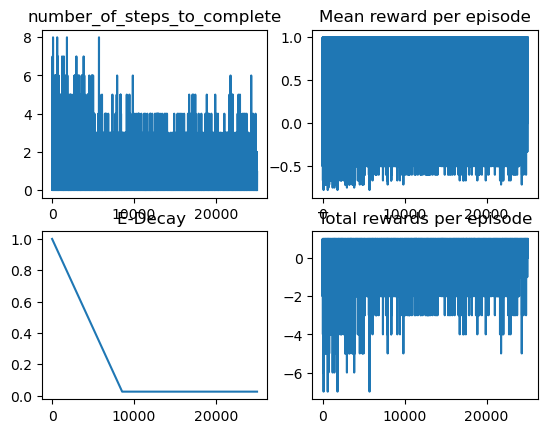

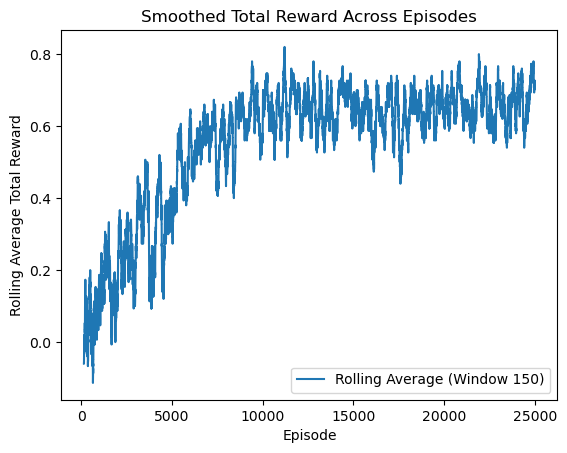

In [9]:
# Plotting

# 1: Create a single figure with two subplots for raw insight
fig, ax = plt.subplots(2, 2)

# Plot the data in the first subplot
ax[0][0].plot(number_of_steps_to_complete)
ax[0][0].set_title("number_of_steps_to_complete")

# Plot the data in the second subplot
ax[0][1].plot(mean_reward_per_episode)
ax[0][1].set_title("Mean reward per episode")

# Plot the data in the second subplot
ax[1][0].plot(epsilon_history)
ax[1][0].set_title("E-Decay ")

# Plot the data in the second subplot
ax[1][1].plot(total_reward_per_episode)
ax[1][1].set_title("Total rewards per episode")

# Show the figure
plt.show()
plt.close()



# 2: Plot the rolling averages

plt.plot(rolling_averages_eps, rolling_averages, label=f'Rolling Average (Window {rolling_window_size})')
plt.xlabel('Episode')
plt.ylabel('Rolling Average Total Reward')
plt.title('Smoothed Total Reward Across Episodes')
plt.legend()
plt.show()




In [10]:
# Saving Model

current_time = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M")
models_dir = 'Adaptation_Engine/RL_Algorithms'


filename = f"{current_time}_WorkoutEnv_QLearning_Cluster1_V1.pickle"
file_path = os.path.join(models_dir, filename)

# Check if the directory for models exists
if not os.path.exists(models_dir):
    os.makedirs(models_dir)

# Check if saving
print(f"saving to: {file_path}")

# Save the metrics and the model to disk
with open(file_path, 'wb') as file:
    pickle_data = {'mean_reward_per_episode': mean_reward_per_episode,
                   'total_reward_per_episode': total_reward_per_episode,
                   'number_of_steps_to_complete': number_of_steps_to_complete,
                   'q_table': q_table}
    pickle.dump(pickle_data, file)


saving to: Adaptation_Engine/RL_Algorithms\2025-08-08_13-26_WorkoutEnv_QLearning_Cluster1_V1.pickle


In [11]:
# Additional metrics 
print(f"Mean Total Reward: {np.mean(total_reward_per_episode):.2f}")
print(f"Std Dev Total Reward: {np.std(total_reward_per_episode):.2f}")
print(f"Mean Episode Length: {np.mean(number_of_steps_to_complete):.2f} steps")

print("Reward distribution (rounded):")
print(pd.Series(total_reward_per_episode).round().value_counts().sort_index())

print(f"Min Episode Reward: {np.min(total_reward_per_episode)}")
print(f"Max Episode Reward: {np.max(total_reward_per_episode)}")


Mean Total Reward: 0.55
Std Dev Total Reward: 0.84
Mean Episode Length: 0.45 steps
Reward distribution (rounded):
-7        4
-6        6
-5       29
-4       67
-3      171
-2      586
-1     1582
 0     5095
 1    17460
dtype: int64
Min Episode Reward: -7
Max Episode Reward: 1
